<a href="https://colab.research.google.com/github/stevengregori92/ClusteringIntro/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

#Import Dataset

In [2]:
!gdown https://drive.google.com/uc?id=1avqCEehtlRzGifwj_ZjcX3qmHpBxG4QF

Downloading...
From: https://drive.google.com/uc?id=1avqCEehtlRzGifwj_ZjcX3qmHpBxG4QF
To: /content/customer.csv
100% 15.0k/15.0k [00:00<00:00, 59.1MB/s]


In [3]:
df = pd.read_csv('customer.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#Tentukan jumlah cluster

K-means & K-nodes = K-prototype

In [4]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

  0%|          | 0/8 [00:00<?, ?it/s]

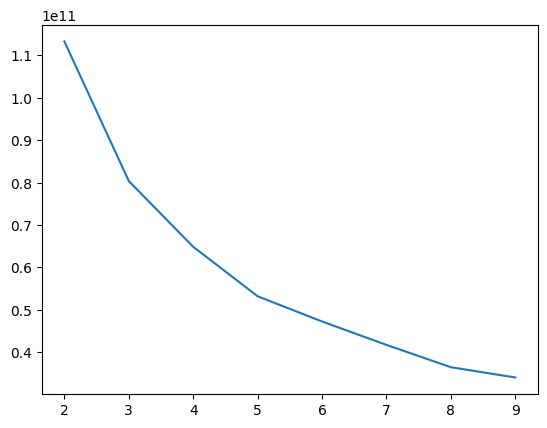

In [6]:
score=[]
for k in tqdm(range(2, 10)):
  model = KPrototypes(n_clusters=k)
  model.fit(df, categorical=[0,1])
  score.append(model.cost_)
plt.plot(range(2, 10), score)

#Training

In [7]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0,1])

In [8]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [9]:
df_pred = df.copy()
df_pred['cluster'] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


#Analyze Cluster

In [10]:
centroids = model.cluster_centroids_
centroids.shape

(3, 8)

In [11]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [12]:
df_centroids = pd.DataFrame(centroids, columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
                                                'Delicassen', 'Channel', 'Region'])

df_centroids[['Channel', 'Region']] = df_centroids[['Channel', 'Region']].astype(int)
df_centroids

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667,1,3
1,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000,2,3
2,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970,1,3


orang 0: orang hemat<br>
orang 1: peminat fresh food, milk, frozen, delicassen <br>
orang 2: peminat milk, grocery, frozen, Detergents_paper, Delicassen <br>

In [13]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

#Popular Conventional Approach

Melakukan customer segmentation berdasarkan RFM (Recency - Frecuency - Monetary)
- Recency: seberapa recent transaksi
- Frecuency: seberapa sering transaksi
- Monetary: seberapa besar transaksi